In [30]:
import pandas as pd
import numpy as np

# import custom modules
import acquire
import prepare
import explore

# visualization imports
import seaborn as sns
import matplotlib.pyplot as plt

# Modeling and evaluation imports
import scipy.stats as stats
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# suppress warning notifications
import warnings
warnings.filterwarnings("ignore")

# Project Overview and Goals

<div class="alert alert-block alert-success">
<b><font size="+1">The purpose of this project is to aquire customer data for the Telco Company from a database, explore that data, create a model to predict customer churn, and utilize that model to make predictions from a group of customers
<br><br>
    
    
Goal 1: Create a model that can predict churn with greater accuracy than baseline
<br>
    Goal 2: Find what drives customer churn at Telco and make recommendations to improve retention

<hr style="border:10px solid purple">


# Acquire Data

In [31]:
# read telco data from a dataframe using our modular function to query SQL database
df = acquire.get_telco_data()

### Sumarize Data

In [3]:
# explore counts and DataTypes for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   internet_service_type_id  7043 non-null   int64  
 1   payment_type_id           7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [4]:
# look at a sample of our data
df.head().T

,0,1,2,3,4
internet_service_type_id,1,1,2,2,2
payment_type_id,2,2,1,1,2
contract_type_id,2,1,1,1,1
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes


In [5]:
# unique values for each column to see which are categorical, binary, and continuous
df.nunique()

internet_service_type_id       3
payment_type_id                4
contract_type_id               3
customer_id                 7043
gender                         2
senior_citizen                 2
partner                        2
dependents                     2
tenure                        73
phone_service                  2
multiple_lines                 3
online_security                3
online_backup                  3
device_protection              3
tech_support                   3
streaming_tv                   3
streaming_movies               3
paperless_billing              2
monthly_charges             1585
total_charges               6531
churn                          2
contract_type                  3
payment_type                   4
internet_service_type          3
dtype: int64

<div class="alert alert-block alert-success"><b><font size="+1">
Takeaways from Acquire:<br>
-  Acquired data from SQL server and saved a local .csv file using function in my acquire.py file<br>  
-  7043 entries with no missing/Null values<br>
-  Categorical columns that need to be encoded<br>
-  Numerical column that requires datatype conversions from string to float (total charges)<br>
    

<hr style="border:10px solid purple">


# Prepare Data

In [6]:
# Prepare Telco data using the prep_telco function in our prepare.py file
df = prepare.prep_telco(df)
df.head(1).T

,0
customer_id,0002-ORFBO
senior_citizen,0
tenure,9
monthly_charges,65.6
total_charges,593.3
male,0
partner,1
dependents,1
phone,1
paperless_billing,1


In [7]:
# verify size of our transformed dataframe
df.shape

(7043, 35)

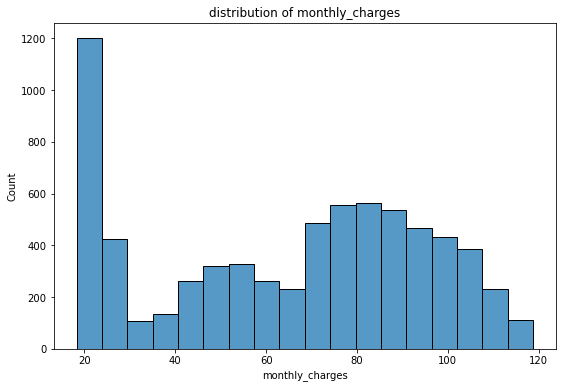

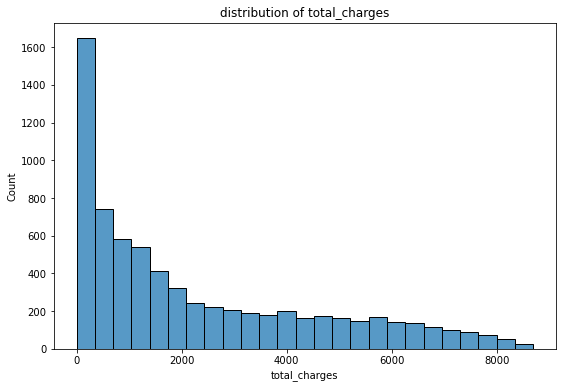

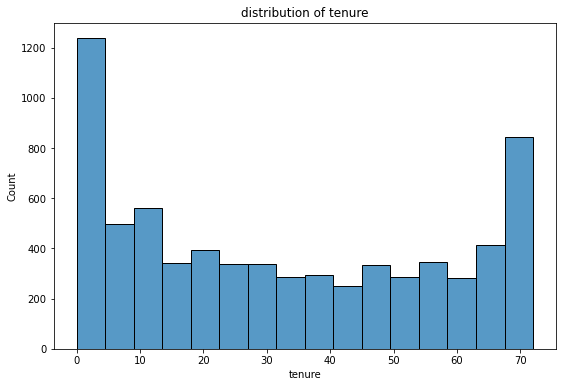

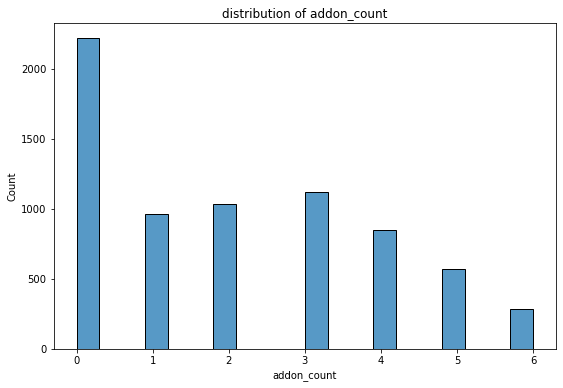

In [8]:
# plot distributions of numerical values
nums = ['monthly_charges', 'total_charges', 'tenure', 'addon_count']
for col in nums:
    sns.histplot(x=col, data=df, palette="muted",)
    plt.title(f'distribution of {col}')
    plt.gcf().set_size_inches(9, 6)
    plt.show()

In [9]:
# split data into Train, Validate, and Test datasets in an 60% / 20% / 20% ratio
# using the my_split function in the prepare.py file
train, validate, test = prepare.my_split(df, target='churn')
train.shape, validate.shape, test.shape

((4225, 35), (1409, 35), (1409, 35))

<div class="alert alert-block alert-success"><b><font size="+1">
Takeaways from Prepare:<br><br>
- Deleted '_id' columns that contained redundant information<br>
- Converted total_charges from a string to a float<br><br>
* NOTE: There were 11 entries of 0 for total_charges, but in each case the tenure was also 0 indicating they were new customers; no values were imputed because this was a logical value<br><br>
- Encoded categorical and binary columns using 1-hot encoding<br>
- Renamed some columns for brevity<br>
- Created 'addon_count' column, a count of how many internet add-ons each customer has<br>
- Split Data into 60% Train, 20% Validate, and 20% Test using 'Churn' as stratification<br>

<hr style="border:10px solid purple">


# Data Exploration

### Which features show correlation to churn?

In [10]:
# call custom function in explore.py to compare the absolute value of linear correlation for each column to churn
explore.correlation_report(train, target='churn')

,Correlation
contract_type_month-to-month,0.410128
tenure,0.362616
tech_support_no,0.333045
online_security_no,0.331968
contract_type_two_year,0.307082
internet_type_fiber_optic,0.304504
payment_type_electronic_check,0.292367
online_backup_no,0.270391
device_protection_no,0.254391
internet_type_none,0.218102


<div class="alert alert-block alert-warning">


Correlation test takeaways:<br>
- Contract types, fiber optic internet, payment by check, and not having add-ons showed higher correlation to churn<br>
- Phone service, gender, and multiple lines showed lower correlation to churn

##  What is our baseline churn rate?

In [11]:
# determine the percentage of customers that churn/do not churn
baseline = round(train.churn.mean() ,4)

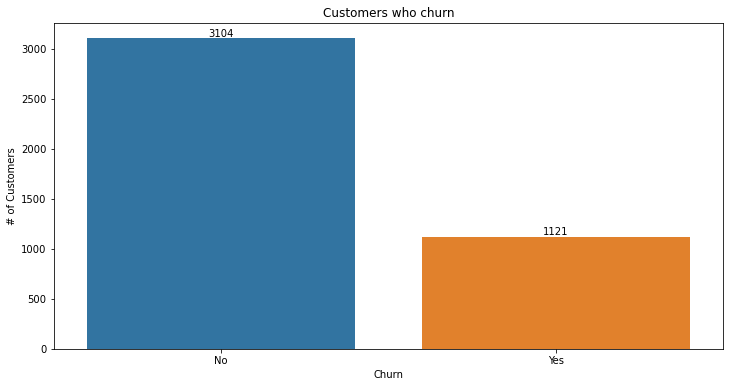

Our baseline for predictions is that  0.2653  of customers churn
                            and that  0.7347 of customers do not churn


In [12]:
#plot distribution using custom function in our explore.py file
explore.churn_plot(train, col='churn')

## Does having internet service increase likelihood of churn?

In [13]:
# create subsets of those with and without internet and run tests
internet = train[train.internet_type_none == 0]
no_internet = train[train.internet_type_none == 1]
internet.shape, no_internet.shape

((3316, 35), (909, 35))

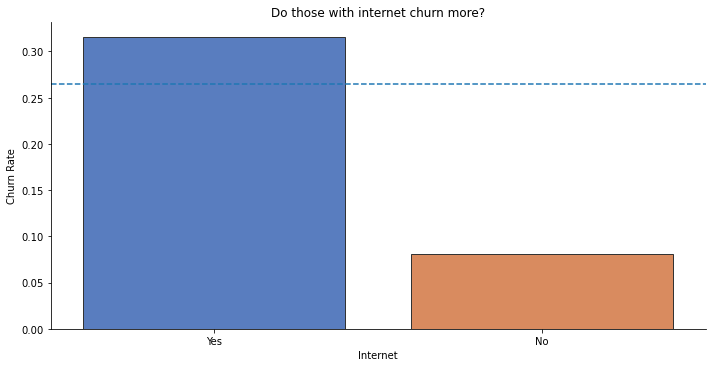

Churn rate of those with internet is 0.3157
Churn rate of those without internet is 0.0814


In [14]:
# display factor plot using function from the explore.py file
explore.internet_plot(train)

### it certainly appears those with internet churn more often than those without.  Let's test it!
 

- **Hypothesis**

- alpha = .05

- $H_0$: There is no difference in churn between those with and without internet service

- $H_a$: There is a significant difference in churn between those with and without internet service


In [15]:
# Perform Independent T-Test: 2 samples, normal distribution, test variance
variance = internet.churn.var() == no_internet.churn.var()
α = .05
t, p = stats.ttest_ind(internet.churn, no_internet.churn, equal_var=variance)
if p < α:
    print('We reject the null hypothesis.')
else:
    print('The null hypothesis is confirmed')

We reject the null hypothesis.


<div class="alert alert-block alert-warning">

**Conclusion** 

- We reject $H_0$ that the churn rate is the same for customers with or without internet service.

**Takeaway**

- Internet Service will be a useful feature for modeling. 

## Does the number of internet service add-ons affect churn rate?

In [16]:
# create subset of those with and without add-ons
adds = internet[internet.addon_count > 0]
no_adds = internet[internet.addon_count == 0]
adds.shape, no_adds.shape

((2878, 35), (438, 35))

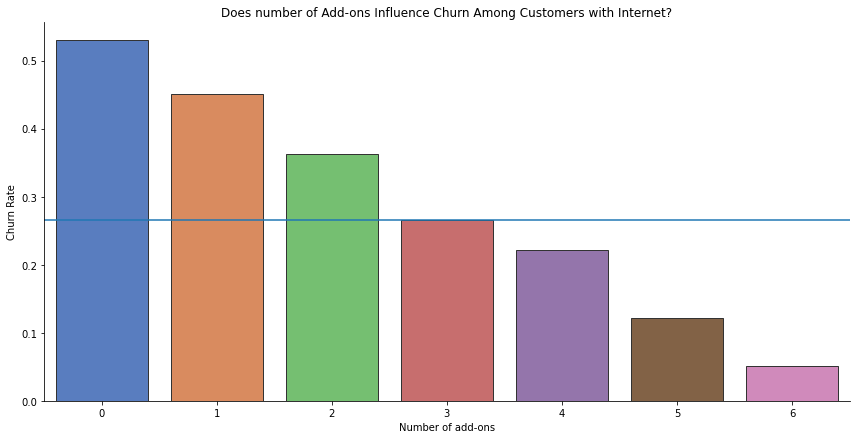

In [17]:
# Plot the churn rate for internet customers with different number of add-ons
p = sns.factorplot( x="addon_count", y="churn",  data=internet, size=6, 
                   aspect=2, kind="bar", palette="muted", ci=None, 
                   edgecolor=".2")
plt.axhline(baseline, label = 'overall churn rate')
#p.set_xticklabels(['Yes','No'])
p.set_ylabels("Churn Rate")
p.set_xlabels("Number of add-ons")
plt.title('Does number of Add-ons Influence Churn Among Customers with Internet?')
plt.show()

## it certainly appears those with internet churn more often than those without.  Let's test it!
   #### Use a chi square test

- **Hypothesis**

- $H_0$: 'Churn is independent of the number of add-on services'

- $H_a$: 'Churn is dependent on the number of add-on services'

In [18]:
# create observations using crosstab
observed = pd.crosstab(internet.churn, internet.addon_count)

# calculate chi2 and p values
chi2, p, degf, expected = stats.chi2_contingency(observed)

expected = pd.DataFrame(expected).astype(int)

print('Observed\n')
print(pd.DataFrame(observed.values))
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print('')

if p < α:
    print('We reject the null hypothesis.')
else:
    print('The null hypothesis is confirmed')

Observed

     0    1    2    3    4    5    6
0  206  315  374  490  401  316  167
1  232  258  213  177  114   44    9
---
Expected

     0    1    2    3    4    5    6
0  299  392  401  456  352  246  120
1  138  180  185  210  162  113   55
---

chi^2 = 295.3231
p     = 0.0000

We reject the null hypothesis.


<div class="alert alert-block alert-warning">

**Conclusion** 

- We reject $H_0$ that the churn rate is independent of the number of add-on services.

**Takeaway**

- Internet users with more add-ons churn less

## Were customers who churn paying higher prices for the same services?

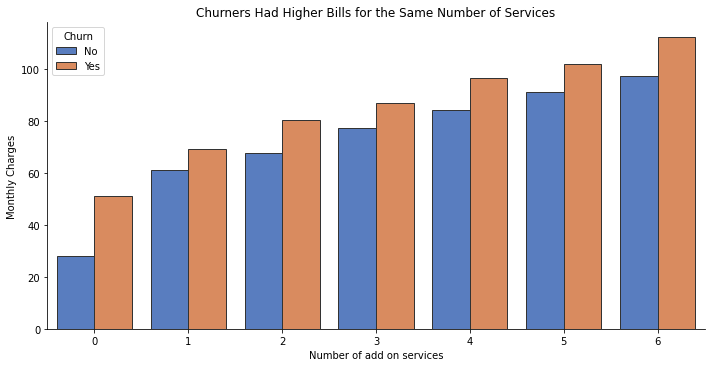

In [19]:
m = sns.factorplot(x="addon_count", y="monthly_charges", hue='churn', data=train,
                   size=5, aspect=2, kind="bar", palette="muted", ci=None, 
                   edgecolor=".2", legend=False)

# sns.barplot(x='addon_count', y='monthly_charges', data=internet, hue='churn', palette='muted', size=5, aspect=2,)
plt.xlabel('Number of add on services')
plt.ylabel('Monthly Charges')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

<div class="alert alert-block alert-warning">

**Conclusion** 

- Customers that churned paid more for the same number of services

**Takeaway**

- More add-ons made customers more likely to stay, and if the price of the add-ons is lower they are even more likely to be retained

<div class="alert alert-block alert-success"><b><font size="+1">

# Takeaways from Data Exploration

- We've identified that internet customers churn at a higher rate
- Internet customers with fewer add-on services, and those that pay more for internet services, churn more
- Gender, phone service, and multiple lines are our least significant indicators of churn and will not be included in the models
- During modeling we'll begin with the features we determined to be most important (internet, add-ons, and contract-type), and add more features to refine results 

<hr style="border:10px solid purple">


# Model and Evaluate

### Baseline Accuracy

- It was previously determined that the baseline of customers who do not churn is 0.7347. 
- If we predict 'No Churn' for every observation, the accuracy would be 73.47%, so we are going to attempt to create a model that beats that standard.

In [20]:
# identify features
features = [ 'senior_citizen', 'tenure', 'monthly_charges',
       'total_charges',  'dependents', 'paperless_billing', 
       'online_security_no', 'online_security_yes', 'online_backup_no',
       'online_backup_yes', 'device_protection_no',
       'device_protection_yes', 'tech_support_no', 'tech_support_yes',
       'streaming_tv_no', 'streaming_tv_yes', 'streaming_movies_no',
       'streaming_movies_yes', 'contract_type_month-to-month',
       'contract_type_one_year', 'contract_type_two_year',
       'payment_type_bank_transfer_auto', 'payment_type_credit_card_auto',
       'payment_type_electronic_check', 'payment_type_mailed_check',
       'internet_type_dsl', 'internet_type_fiber_optic',
       'internet_type_none', 'addon_count']

### Feature Selection

- Only used features that were found to be significant during exploration
- The only features omitted in the final models were: 'male', 'phone' and 'multiple_lines'

### Initial testing 
- Evaluated models on accuracy, but because we have an imbalanceed class I also considered f1 score in order to wiegh precision and recall
- Utilized three different model types, and adjusted arguments to find best fit
- Using reduced features gave better accuracy scores, but poor f1 scores
- Including a more robust feature list resulted in nearly the same accuracy, but improved f1 score considerably

### Define X and y train, val, and test datasets.

In [21]:
# define X variables
X_train = train[features]
X_val = validate[features]
X_test = test[features]
X_train.shape, X_val.shape, X_test.shape

((4225, 29), (1409, 29), (1409, 29))

In [22]:
# Define y variables
y_train = train.churn
y_val = validate.churn
y_test = test.churn
y_train.shape, y_val.shape, y_test.shape

((4225,), (1409,), (1409,))

## K-Nearest Neighbor Model

In [23]:
# create model
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)

# make predictions
y_pred= knn.predict(X_train)
y_predv=knn.predict(X_val)

# print classification report
print('                KNN model')
print('*******************************************')
print(' Training set')
print(classification_report(y_train, y_pred))
print(' Validation set')
print(classification_report(y_val, y_predv))

                KNN model
*******************************************
 Training set
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      3104
           1       0.73      0.42      0.53      1121

    accuracy                           0.81      4225
   macro avg       0.78      0.68      0.71      4225
weighted avg       0.80      0.81      0.79      4225

 Validation set
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1035
           1       0.63      0.37      0.46       374

    accuracy                           0.77      1409
   macro avg       0.71      0.64      0.66      1409
weighted avg       0.76      0.77      0.75      1409



### Random Forest Model

In [24]:
# create the model
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=39,
                            n_estimators=100,
                            max_depth=30, 
                            random_state=123)
# fit the model
rf.fit(X_train, y_train)

# make predictions
y_pred= rf.predict(X_train)
y_predv=rf.predict(X_val)

# print classification reports
print('                RF model')
print('*******************************************')
print(' Training set')
print(classification_report(y_train, y_pred))
print(' Validation set')
print(classification_report(y_val, y_predv))


                RF model
*******************************************
 Training set
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      3104
           1       0.71      0.49      0.58      1121

    accuracy                           0.81      4225
   macro avg       0.77      0.71      0.73      4225
weighted avg       0.80      0.81      0.80      4225

 Validation set
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1035
           1       0.64      0.44      0.52       374

    accuracy                           0.79      1409
   macro avg       0.73      0.67      0.69      1409
weighted avg       0.77      0.79      0.77      1409



### Logistic Regression Model

In [25]:
# create model
logit = LogisticRegression(C=1, random_state=333)

# fit model
logit.fit(X_train, y_train)

# make predictions
y_pred= logit.predict(X_train)
y_predv=logit.predict(X_val)

#output classification reports
print('                LR model')
print('*******************************************')
print(' Training set')
print(classification_report(y_train, y_pred))
print(' Validation set')
print(classification_report(y_val, y_predv))

                LR model
*******************************************
 Training set
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      3104
           1       0.66      0.56      0.61      1121

    accuracy                           0.81      4225
   macro avg       0.76      0.73      0.74      4225
weighted avg       0.80      0.81      0.80      4225

 Validation set
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.54      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



<div class="alert alert-block alert-warning"><b><font size="+1">


** Model and Evaluate - Takeaways **

- All three models had similar accuracy for training and validate sets, with scores ranging from 79-81%<br>
- Overall f1 scores also had similar values accross the three models<br>

- Because of our imbalanced data I used the f1 score of the positive case, customers who churn, as the deciding factor for which model to move forward.<br>
- By this measure the Logistic Regression Model performed best:

| Model | F1 score for train '1's | F1 score for validate '1's  |
| --- | --- | --- |
| K-Nearest Neighbor | .53 | .46 |
| Random Forest | .58 | .52 |
| Logistic Regression | .61| .58 |

<hr style="border:10px solid purple">


## Testing the  Best Model

- Now testing the Logistic Regression model against our test data

In [26]:
# make predictions
y_predt= logit.predict(X_test)

#output classification reports
print('                Final model')
print('*******************************************')
print(' Test dataset')
print(classification_report(y_test, y_predt))


                Final model
*******************************************
 Test dataset
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.56      0.61       374

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



<div class="alert alert-block alert-success"><b><font size="+1">

## Testing Takeaways 
### 81% accurate prediction of churn on the test dataset

- After testing three models they all had similar accuracies.  
    
- Chose the Logistic Regression due to superior f1 score on the churn case
    
- Performance on the test set was consistent with out validation data performance


<hr style="border:10px solid purple">


# Create the Predictions CSV

- Create a CSV file with 3 columns

        customer id

        probability of churn

        prediciton of churn (1=churn, 0=not_churn)


- These predictions are from our Logistic Regression model which was our best performing model

In [27]:
# create the probabilities column based on our previously trained model
proba_test = pd.DataFrame(logit.predict_proba(X_test))
prob_col = (proba_test[1])

# create the predictions column based upon our previously trained model
pred_col = pd.Series(y_predt)

# create the customer id column
id_col = pd.Series(test.customer_id.to_list())

In [28]:
# create dataframe of our columns
output = pd.concat([id_col, prob_col, pred_col],axis=1)
output.head()

,0,1,1
0,7869-ZYDST,0.244641,0
1,0516-OOHAR,0.228900,0
2,6029-CSMJE,0.343884,0
3,0895-UADGO,0.130887,0
4,9831-BPFRI,0.173713,0


In [32]:
# export output to csv file
output.to_csv('Predictions.csv', index=False, header=False)
train.to_csv('telco_train.csv', index=False, header=True)

<hr style="border:10px solid purple">



# Conclusions and Next Steps

- We created a churn predictor that beat the baseline prediction by more than 7%

- The customers that our model predicted as more likely-churned, but who haven't churned yet, should be targeted for retention incentives.

- Customers with Internet Service (particularly those that do not have add-ons) are more likely to churn, especially if their bills are higher.  Making the add-ons less expensive could help retain customers longer.

- Shorter contract types showed higher correlation to churn, and given more time I would have explored that further to determine what other factors drove those customers to churn.


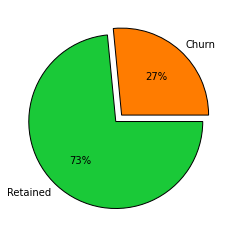

In [86]:
# Training churn
data = [train.churn.mean(), 1-train.churn.mean()]
labels = ['Churn', 'Retained']

#define Seaborn color palette to use
colors = sns.color_palette('bright')[1:3]
explode = [0, 0.1]
#create pie chart
plt.pie(data, labels = labels, explode = explode, colors = colors, autopct='%.0f%%',wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1,
                      'antialiased': True})
plt.savefig('demo.png', transparent=True)

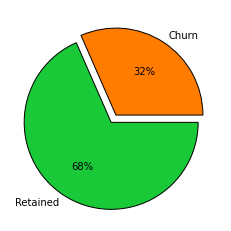

In [94]:

data = [internet.churn.mean(), 1-internet.churn.mean()]
labels = ['Churn', 'Retained']

#define Seaborn color palette to use
colors = sns.color_palette('bright')[1:3]
explode = [0, 0.1]
#create pie chart
plt.pie(data, labels = labels, explode = explode, colors = colors, autopct='%.0f%%',wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1,
                      'antialiased': True})
plt.savefig('demo2.png', transparent=True)

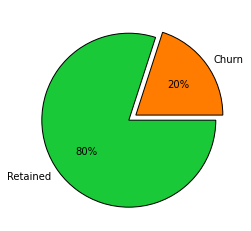

In [83]:
threeplus = train[train.addon_count >= 3]

data = [threeplus.churn.mean(), 1-threeplus.churn.mean()]
labels = ['Churn', 'Retained']

#define Seaborn color palette to use
colors = sns.color_palette('bright')[1:3]
explode = [0, 0.1]
#create pie chart
plt.pie(data, labels = labels, explode = explode, colors = colors, autopct='%.0f%%',wedgeprops = {"edgecolor" : "black",
                      'linewidth': 1,
                      'antialiased': True})
plt.savefig('demo3.png', transparent=True)

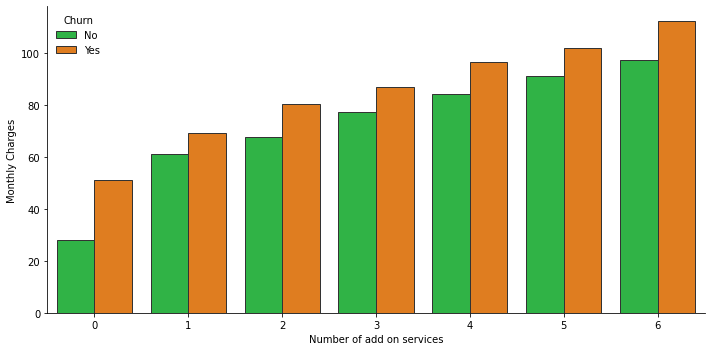

In [128]:
# palette = ['tab:bright'1, 'tab:bright',2]
colors = sns.color_palette('bright')[2:0:-1]

m = sns.factorplot(x="addon_count", y="monthly_charges", hue='churn', data=train,
                   size=5, aspect=2, kind="bar", palette=colors, ci=None, 
                   edgecolor=".2", legend=False)

# sns.barplot(x='addon_count', y='monthly_charges', data=internet, hue='churn', palette='muted', size=5, aspect=2,)
plt.xlabel('Number of add on services')
plt.ylabel('Monthly Charges')
plt.legend(title='Churn', labels=['No', 'Yes'], fancybox=True,framealpha=0)
plt.savefig('demo4.png', transparent=True)
plt.show()


In [129]:
y = train[(train.addon_count==6) & (train.churn ==1)].monthly_charges.mean()
x = train[(train.addon_count==6) & (train.churn ==0)].monthly_charges.mean()
y-x

15.120059880239552

TypeError: __init__() got an unexpected keyword argument 'rows'

In [135]:
import tabulate
data = [["", "Accuracy"],
    ["Baseline","73%"],
         ["Our Model","81%"]]
        
table = tabulate.tabulate(data, tablefmt='html')
table

,Accuracy
Baseline,73%
Our Model,81%
